In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
disaster_df = pd.read_csv('/content/drive/Shareddrives/CIS 5450 Project/datasets/DisasterDeclarationsSummaries.csv')
assistance_df = pd.read_csv('/content/drive/Shareddrives/CIS 5450 Project/datasets/PublicAssistanceFundedProjectsDetails.csv')

In [ ]:
assistance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797674 entries, 0 to 797673
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   disasterNumber         797674 non-null  int64  
 1   declarationDate        797674 non-null  object 
 2   incidentType           797674 non-null  object 
 3   pwNumber               797674 non-null  int64  
 4   applicationTitle       791452 non-null  object 
 5   applicantId            797674 non-null  object 
 6   damageCategoryCode     797674 non-null  object 
 7   projectSize            784666 non-null  object 
 8   county                 784666 non-null  object 
 9   countyCode             784666 non-null  float64
 10  state                  797674 non-null  object 
 11  stateCode              797674 non-null  object 
 12  stateNumberCode        797674 non-null  int64  
 13  projectAmount          797674 non-null  float64
 14  federalShareObligated  797674 non-nu

# FIPS Code Assembly

In [ ]:
# make fips code column
fips_df = assistance_df.copy()

# There are quite a few rows with null values, so we need to drop them
fips_df = fips_df.dropna()

fips_df["countyCode"] = fips_df["countyCode"].astype(int)
fips_df["stateNumberCode"] = fips_df["stateNumberCode"].apply(lambda x: str(x).zfill(2))
fips_df["countyCode"] = fips_df["countyCode"].apply(lambda x: str(x).zfill(3))
fips_df["fipsCode"] = fips_df["stateNumberCode"] + fips_df["countyCode"]

fips_df.head()

<ipython-input-5-a87f61a746cd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fips_df["countyCode"] = fips_df["countyCode"].astype(int)


,disasterNumber,declarationDate,incidentType,pwNumber,applicationTitle,applicantId,damageCategoryCode,projectSize,county,countyCode,...,projectAmount,federalShareObligated,totalObligated,obligatedDate,dcc,damageCategory,lastRefresh,hash,id,fipsCode
0,1239,1998-08-26T00:00:00.000Z,Severe Storm,1,IMMEDIATE NEEDS FUNDING,465-19792-00,B - Protective Measures,Large,Val Verde,465,...,100000.00,75000.00,80340.00,1998-09-15T00:00:00.000Z,B,Protective Measures,2023-03-18T17:02:21.032Z,ab44f45c1d8c17a851c502843931634518fb37e6,145230ef-5029-43b6-bf93-24f60d786b9d,48465
1,1239,1998-08-26T00:00:00.000Z,Severe Storm,2,(L),465-19792-01,F - Public Utilities,Large,Val Verde,465,...,423791.13,317843.35,333171.72,1998-09-17T00:00:00.000Z,F,Public Utilities,2023-03-18T17:02:21.032Z,4428e2c912affed5a02afd89f5b58c97a57193ac,26dab167-6dee-4ae9-a66f-28dce5d8f254,48465
2,1239,1998-08-26T00:00:00.000Z,Severe Storm,3,L,465-99465-00,C - Roads and Bridges,Large,Val Verde,465,...,66966.19,50224.64,53975.01,1998-09-21T00:00:00.000Z,C,Roads and Bridges,2023-03-18T17:02:21.032Z,000de54594e126d1991c514c618053565c854ddb,fa365e8a-7e81-4ef8-a03f-0ef2b28dd6a1,48465
3,1239,1998-08-26T00:00:00.000Z,Severe Storm,4,Not Provided,465-062A0-00,C - Roads and Bridges,Small,Val Verde,465,...,22305.00,16728.75,17745.86,1998-09-21T00:00:00.000Z,C,Roads and Bridges,2023-03-18T17:02:21.032Z,8d0b5dc63472e0caba5689802ca1c06f315f33f6,ec0980af-e42a-45fa-b896-0f8d243fc02b,48465
4,1239,1998-08-26T00:00:00.000Z,Severe Storm,5,Not Provided,465-19792-02,G - Recreational or Other,Small,Val Verde,465,...,19685.50,14764.13,15461.00,1998-09-23T00:00:00.000Z,G,Recreational or Other,2023-03-18T17:02:21.032Z,a41b01a0fa0ea18cc903f3ba2c7709a700538619,eb1a1a1a-6ebc-4f43-a824-cd05d35883d3,48465


# Initial Graphs

[Text(0.5, 1.0, 'Count of Projects by Project Size'),
 Text(0.5, 0, 'Project Size'),
 Text(0, 0.5, 'Incident Count')]

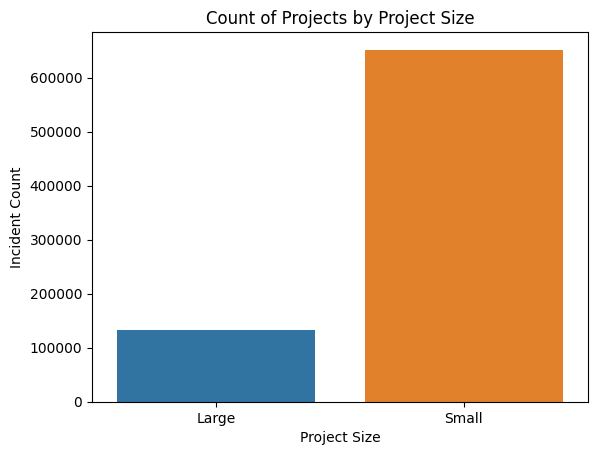

In [ ]:
sns.countplot(x='projectSize', data=fips_df).set(title='Count of Projects by Project Size', xlabel='Project Size', ylabel='Incident Count')

[Text(0.5, 1.0, 'Count of Projects by Incident Category'),
 Text(0.5, 0, 'Incident Category'),
 Text(0, 0.5, 'Incident Count')]

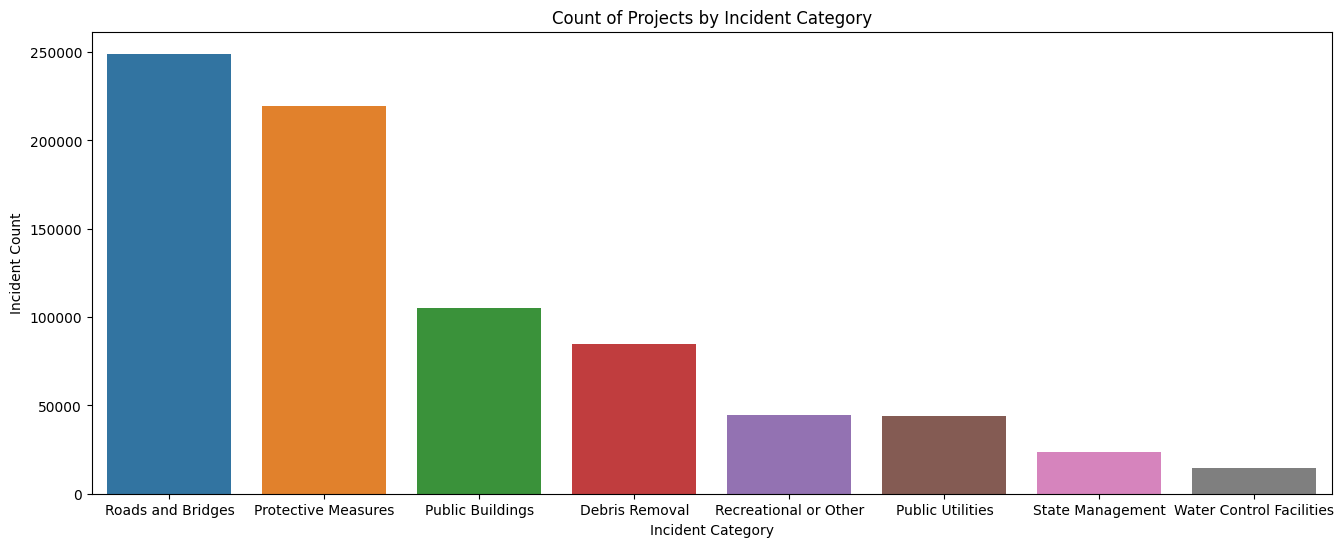

In [ ]:
plt.figure(figsize = (16,6))

sns.countplot(x='damageCategory', data=fips_df, order = fips_df['damageCategory'].value_counts().index).set(title='Count of Projects by Incident Category', xlabel='Incident Category', ylabel='Incident Count')

[Text(0.5, 1.0, 'Count of Projects by Incident Category Seperated by Project Size'),
 Text(0.5, 0, 'Incident Category'),
 Text(0, 0.5, 'Incident Count')]

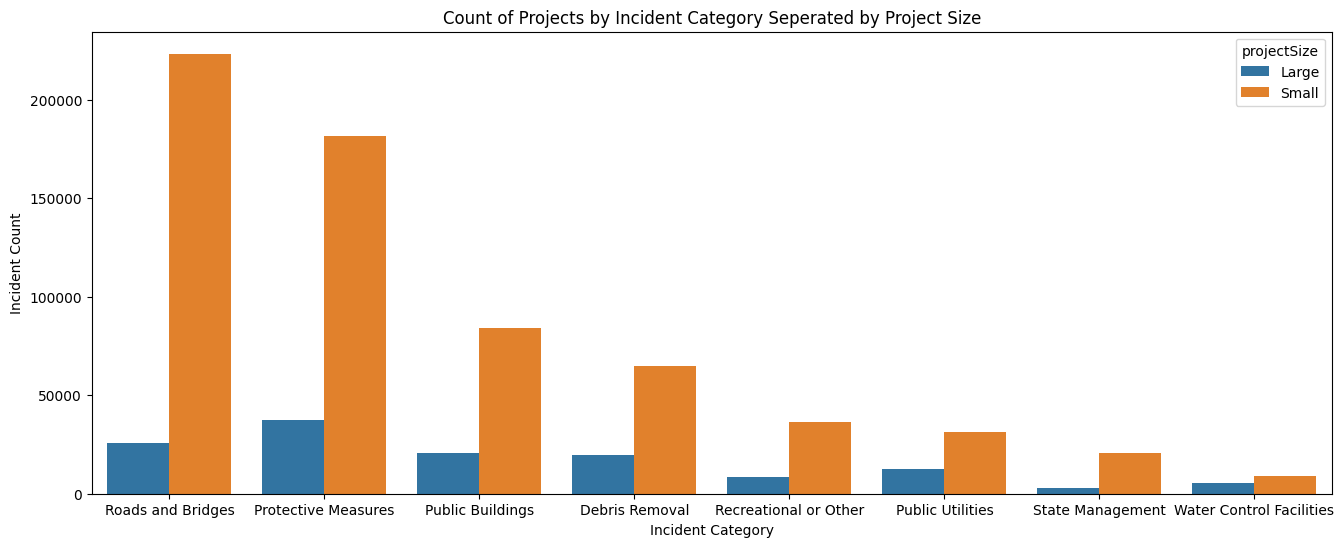

In [ ]:
plt.figure(figsize = (16,6))

sns.countplot(x='damageCategory', hue='projectSize', data=fips_df, order = fips_df['damageCategory'].value_counts().index).set(title='Count of Projects by Incident Category Seperated by Project Size', xlabel='Incident Category', ylabel='Incident Count')

[Text(0.5, 1.0, 'Count of Projects by Incident Type'),
 Text(0.5, 0, 'Incident Type'),
 Text(0, 0.5, 'Incident Count')]

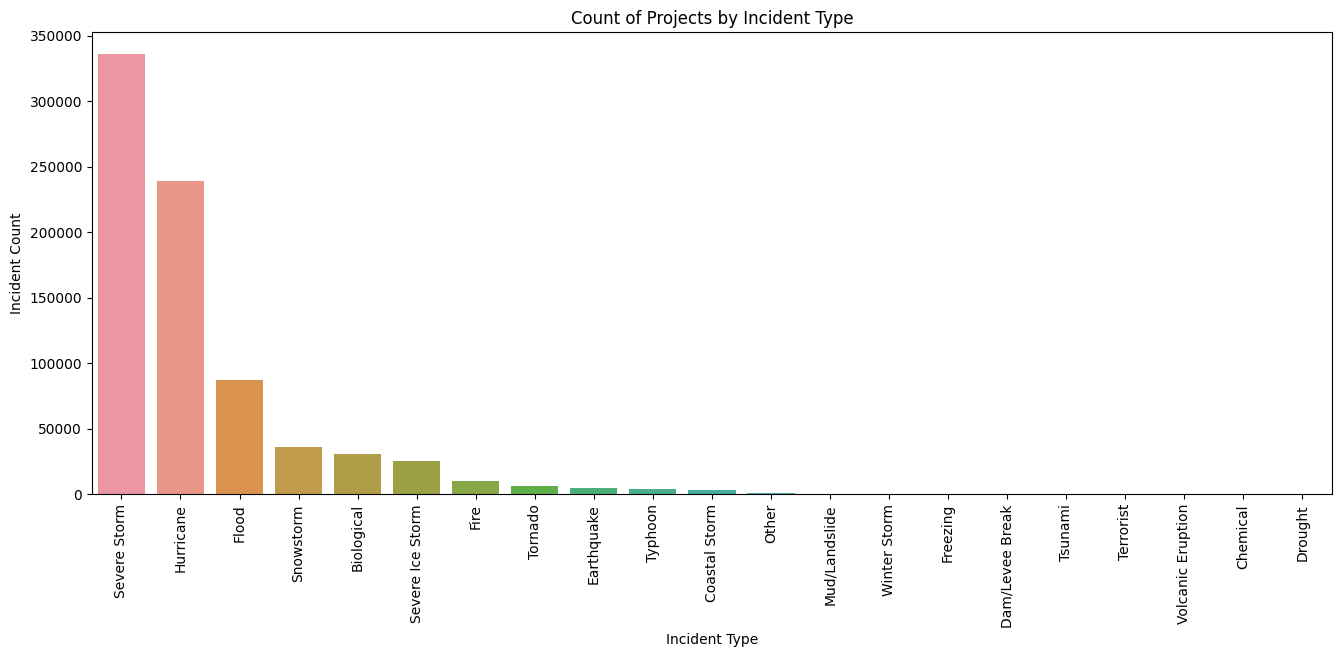

In [ ]:
plt.figure(figsize = (16,6))
plt.xticks(rotation='vertical')

sns.countplot(x='incidentType', orient='v', data=fips_df, order = fips_df['incidentType'].value_counts().index).set(title='Count of Projects by Incident Type', xlabel='Incident Type', ylabel='Incident Count')


[Text(0.5, 1.0, 'Count of Projects by Incident Type Excluding Severe Storms, Floods, and Hurricanes'),
 Text(0.5, 0, 'Incident Type'),
 Text(0, 0.5, 'Incident Count')]

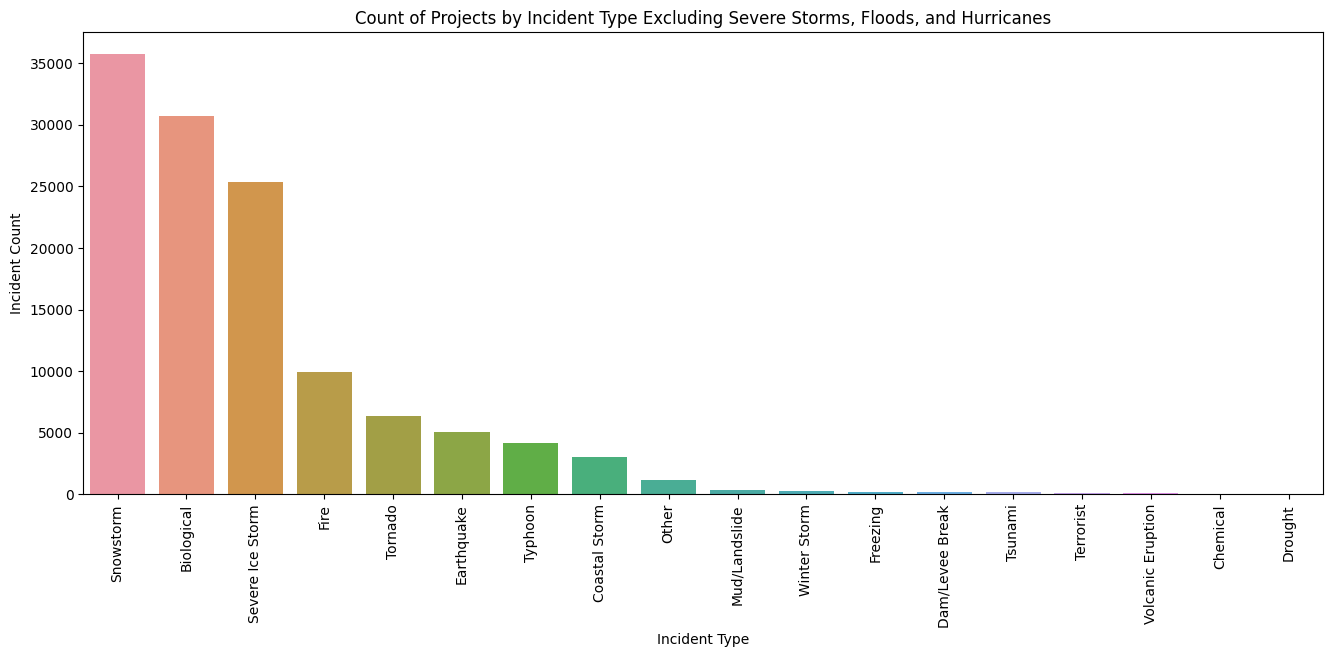

In [ ]:
tmp_df = fips_df[~fips_df['incidentType'].isin(['Severe Storm', 'Flood', 'Hurricane'])]

plt.figure(figsize = (16,6))
plt.xticks(rotation='vertical')

sns.countplot(x='incidentType', orient='v', data=tmp_df, order = tmp_df['incidentType'].value_counts().index).set(title='Count of Projects by Incident Type Excluding Severe Storms, Floods, and Hurricanes', xlabel='Incident Type', ylabel='Incident Count')

In [ ]:
# drop unnecessary date columns
disaster_df = disaster_df.drop(columns=["disasterCloseoutDate", "lastIAFilingDate"])

# drop null values
disaster_df = disaster_df.dropna().reset_index(drop=True)

<Axes: xlabel='state', ylabel='disasterNumber'>

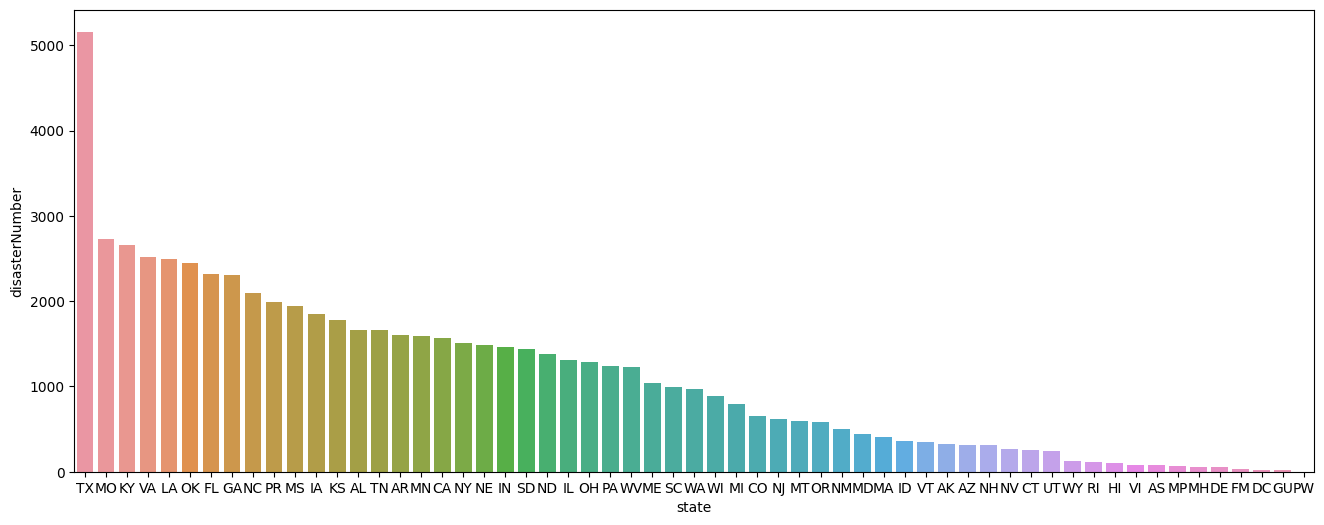

In [13]:


states_count = disaster_df.groupby("state")[["disasterNumber"]].count().sort_values(by="disasterNumber", ascending=False).reset_index(drop=False)

plt.figure(figsize = (16,6))
sns.barplot(x = 'state', data = states_count, y = 'disasterNumber')

# sns.countplot(x='state', data=disaster_df, order = disaster_df['state'].value_counts().index).set(title='Count of Disasters by State', xlabel='State', ylabel='Disaster Count')

In [10]:
states_count

,state,disasterNumber
0,TX,5160
1,MO,2735
2,KY,2663
3,VA,2521
4,LA,2493
5,OK,2451
6,FL,2317
7,GA,2302
8,NC,2091
9,PR,1987


[Text(0.5, 1.0, 'Count of Disasters by Incident Type'),
 Text(0.5, 0, 'Incident Type'),
 Text(0, 0.5, 'Incident Count')]

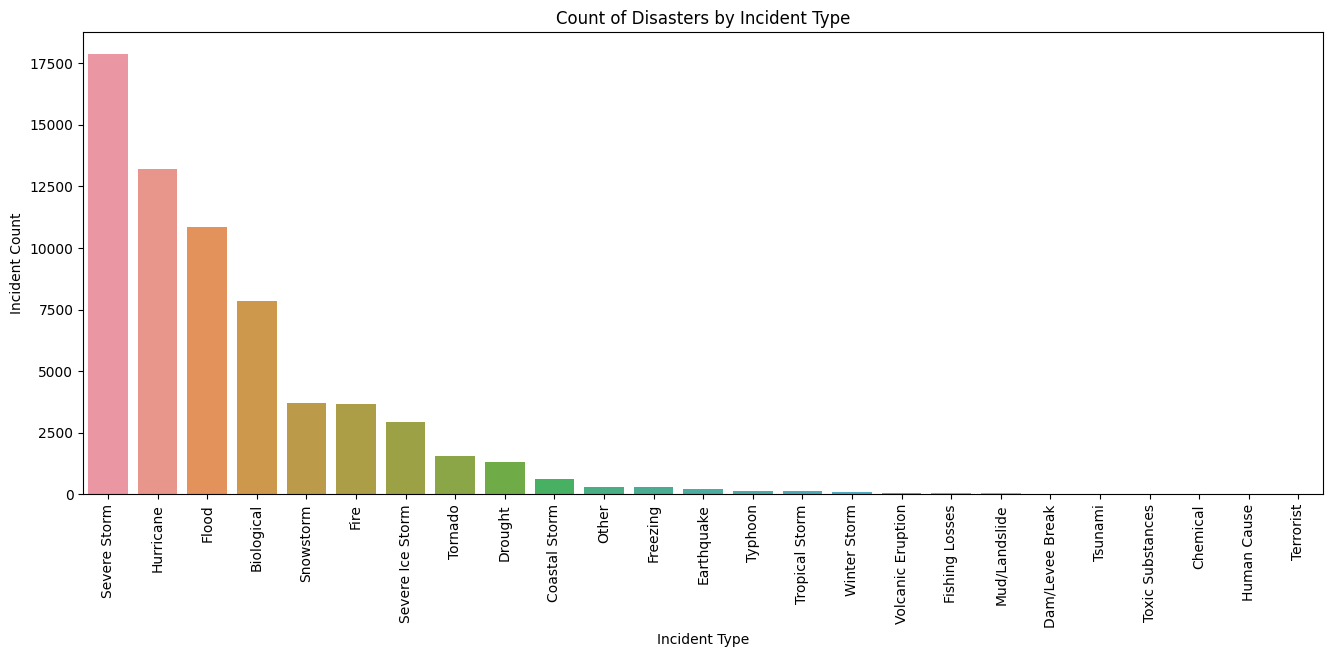

In [ ]:
plt.figure(figsize = (16,6))
plt.xticks(rotation='vertical')

sns.countplot(x='incidentType', orient='v', data=disaster_df, order = disaster_df['incidentType'].value_counts().index).set(title='Count of Disasters by Incident Type', xlabel='Incident Type', ylabel='Incident Count')

[Text(0.5, 1.0, 'Count of TX Disasters by Incident Type'),
 Text(0.5, 0, 'Incident Type'),
 Text(0, 0.5, 'Incident Count')]

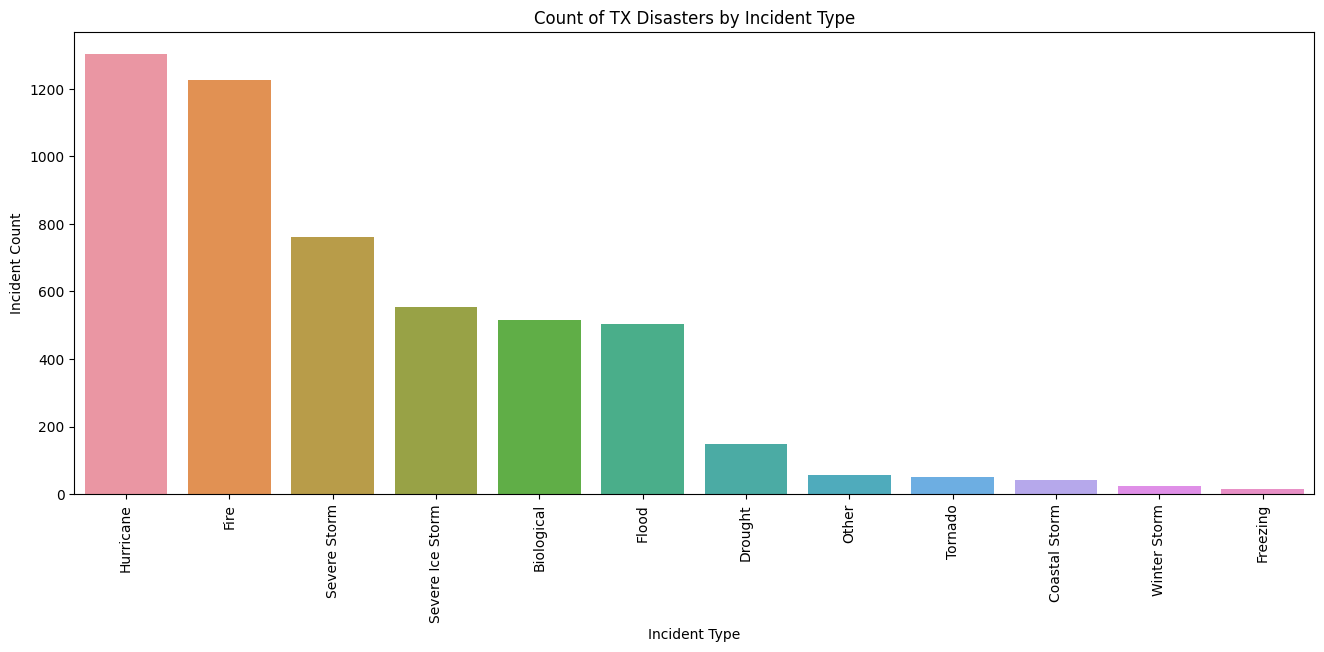

In [ ]:
tmp_df = disaster_df[disaster_df['state'] == 'TX']

plt.figure(figsize = (16,6))
plt.xticks(rotation='vertical')

sns.countplot(x='incidentType', orient='v', data=tmp_df, order = tmp_df['incidentType'].value_counts().index).set(title='Count of TX Disasters by Incident Type', xlabel='Incident Type', ylabel='Incident Count')

# Top County Calculations

In [ ]:
# For this EDA, we want to ignore state-wide assistance programs
top_incident_df = fips_df[fips_df['countyCode'] != '000']

# Create a new dataframe to find the top ten counties with the most incidents
top_incident_df = top_incident_df.groupby("fipsCode").count()["id"].reset_index()
top_incident_df.columns = ["fipsCode", "Incident Count"]
top_incident_df = top_incident_df.sort_values(["Incident Count", 'fipsCode'], ascending = [False, True]).reset_index().drop(columns='index')
top_incident_df['Incident Rank'] = top_incident_df['Incident Count'].rank(method='max').astype('int')

top_incident_df

,fipsCode,Incident Count,Incident Rank
0,12086,7961,3181
1,48201,6610,3180
2,22071,6376,3179
3,12099,4644,3178
4,12011,3715,3177
...,...,...,...
3176,49027,1,40
3177,51021,1,40
3178,51141,1,40
3179,56009,1,40


In [ ]:
# For this EDA, we want to ignore state-wide assistance programs
top_cost_df = fips_df[fips_df['countyCode'] != '000']

# Create a new dataframe to find the top ten counties by total Obligated
top_cost_df = top_cost_df.groupby("fipsCode").sum(numeric_only = True)["totalObligated"].reset_index()
top_cost_df.columns = ["fipsCode", "totalObligated"]
top_cost_df = top_cost_df.sort_values(["totalObligated", "fipsCode"], ascending = [False, True]).reset_index().drop(columns='index')
top_cost_df['Obligated Rank'] = top_cost_df['totalObligated'].rank(method='max').astype('int')

top_cost_df

,fipsCode,totalObligated,Obligated Rank
0,36061,2.196849e+10,3181
1,22071,5.339633e+09,3180
2,48201,2.691589e+09,3179
3,36059,2.182299e+09,3178
4,22033,2.000493e+09,3177
...,...,...,...
3176,48389,3.546960e+03,5
3177,48081,2.859850e+03,4
3178,48421,2.567530e+03,3
3179,48111,2.422700e+03,2


In [ ]:
# Merge the two dataframes as well as fips_df to get the state and county names for readability
combined_df = top_incident_df.merge(right = top_cost_df, on = 'fipsCode', how = 'inner')
combined_df = combined_df.merge(fips_df[['state', 'county', 'fipsCode']], on = 'fipsCode', how = 'inner').drop_duplicates()
combined_df = combined_df.reset_index().drop(columns = 'index')

combined_df

,fipsCode,Incident Count,Incident Rank,totalObligated,Obligated Rank,state,county
0,12086,7961,3181,1.797485e+09,3175,Florida,Miami-Dade
1,48201,6610,3180,2.691589e+09,3179,Texas,Harris
2,22071,6376,3179,5.339633e+09,3180,Louisiana,Orleans
3,12099,4644,3178,6.024836e+08,3159,Florida,Palm Beach
4,12011,3715,3177,7.340095e+08,3164,Florida,Broward
...,...,...,...,...,...,...,...
3176,49027,1,40,4.629796e+04,108,Utah,Millard
3177,51021,1,40,4.125971e+04,93,Virginia,Bland
3178,51141,1,40,1.538583e+04,45,Virginia,Patrick
3179,56009,1,40,3.969021e+04,90,Wyoming,Converse


In [ ]:
#Show the top 10 counties by total incidents
incident_display_df = combined_df.sort_values('Incident Rank', ascending=False)[:10]

incident_display_df

,fipsCode,Incident Count,Incident Rank,totalObligated,Obligated Rank,state,county
0,12086,7961,3181,1.797485e+09,3175,Florida,Miami-Dade
1,48201,6610,3180,2.691589e+09,3179,Texas,Harris
2,22071,6376,3179,5.339633e+09,3180,Louisiana,Orleans
3,12099,4644,3178,6.024836e+08,3159,Florida,Palm Beach
4,12011,3715,3177,7.340095e+08,3164,Florida,Broward
5,34003,3471,3176,2.880505e+08,3140,New Jersey,Bergen
6,48167,3381,3175,4.897872e+08,3154,Texas,Galveston
7,36025,3026,3174,1.204009e+08,3070,New York,Delaware
8,36007,2921,3173,2.176379e+08,3122,New York,Broome
9,36119,2877,3172,3.743342e+08,3151,New York,Westchester


In [ ]:
#Show the top 10 counties by total obligated
obligated_display_df = combined_df.sort_values('Obligated Rank', ascending=False)[:10].reset_index().drop(columns='index')

obligated_display_df

,fipsCode,Incident Count,Incident Rank,totalObligated,Obligated Rank,state,county
0,36061,2435,3165,2.196849e+10,3181,New York,New York
1,22071,6376,3179,5.339633e+09,3180,Louisiana,Orleans
2,48201,6610,3180,2.691589e+09,3179,Texas,Harris
3,36059,2597,3169,2.182299e+09,3178,New York,Nassau
4,22033,2264,3159,2.000493e+09,3177,Louisiana,E. Baton Rouge
5,22087,1386,3129,1.838032e+09,3176,Louisiana,St. Bernard
6,12086,7961,3181,1.797485e+09,3175,Florida,Miami-Dade
7,28047,2543,3167,1.227982e+09,3174,Mississippi,Harrison
8,22019,2395,3163,1.222036e+09,3173,Louisiana,Calcasieu
9,36081,350,2751,1.103568e+09,3172,New York,Queens
